<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'><strong>EABL STOCK PERFORMANCE ANALYSIS </strong></span></b> </div> 

# ***1.BUSINESS UNDERSTANDING***

- East African Breweries Limited (EABL) faces persistent challenges related to stock price volatility and regulatory pressures.

- Over the last decade, EABL has experienced fluctuating stock prices, negatively impacting investor confidence and stability.

- Recent regulatory measures, including stringent filing requirements by the Kenya Revenue Authority, add to the company's challenges.

- This notebook aims to devise data-driven strategies to address these issues and stabilize EABL's stock performance.

- The goal is to mitigate regulatory risks, foster sustained growth in shareholder value, and enhance EABL's resilience in a dynamic industry environment.

## ***Objectives***
- Build a robust time series model leveraging market indicators to forecast future EABL stock prices. 
- Investigate viability of investing in EABL stock prices. 
- Build an anomally detection system to identify unusual or unexpected patterns in EABL stock prices. 

------------------------------

# ***2.DATA UNDERSTANDING***

- Load and inspect the data: Check the structure and completeness of the dataset.
- Data preprocessing: Handle missing values, convert data types if necessary, and set the date column as the index for time series analysis.
- Volatility Insights:
   - Calculate and visualize stock price volatility.
   - Develop a risk model based on historical volatility.
- Abnormal Trade Volume Analysis:
   - Identify and analyze spikes or drops in trade volumes.
- Dividend Analysis:
   - Examine the trend in dividend payouts.
- Trend Analysis:
   - Apply moving averages, trend decomposition, and autocorrelation analysis.
- Lag Analysis:
   - Investigate the influence of external factors like inflation rates, GDP, USD exchange rates, and unemployment rates on EABL stock performance.
- Stock Valuation:
   - Estimate the intrinsic value of EABL stocks using relevant financial metrics.

In [28]:
import pandas as pd

# Load the dataset
csv_path = r"C:\Users\ADMIN\OneDrive\Desktop\DEREK\dsc-capstone-project_finale\data\processed\final_merge.csv"
data = pd.read_csv(csv_path)

# Display the first few rows of the dataset to understand its structure
data


,Unnamed: 0,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share
0,0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,NaN,6.90,161.0000,1.00,0.0,NaN
1,1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,NaN,6.90,161.0000,1.00,0.0,NaN
2,2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,NaN,6.90,162.0000,1.00,0.0,NaN
3,3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,NaN,6.90,162.0000,1.00,0.0,NaN
4,4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,NaN,6.90,163.0000,1.75,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,4348,9/15/2006,141.00,142.00,140.0,141.0,141.00,226100,9,2006,15,5.7,5.93,73.3144,NaN,5.9,8.3
4349,4349,9/14/2006,140.00,143.00,140.0,140.0,141.00,108500,9,2006,14,5.7,5.93,73.3178,NaN,5.9,8.3
4350,4350,9/13/2006,141.00,144.00,140.0,142.0,141.00,190000,9,2006,13,5.7,5.93,73.2778,NaN,5.9,8.3
4351,4351,9/12/2006,141.00,143.00,140.0,140.0,140.00,123900,9,2006,12,5.7,5.93,72.8644,NaN,5.9,8.3


In [29]:
data.dtypes


Unnamed: 0                    int64
Date                         object
Open                        float64
High                        float64
Low                         float64
Close                       float64
Average                     float64
Volume                        int64
Month                         int64
Year                          int64
Day                           int64
Annual Average Inflation    float64
12-Month Inflation          float64
Mean                        float64
Amount                      float64
Dividends per share         float64
Earnings Per Share          float64
dtype: object

- Date: The date of the stock data (object type, which we'll convert to datetime for time series analysis).

- Open, High, Low, Close, Average: Stock prices at the open, high, low, and close of the trading day, along with the average price (float64).

- Volume: The number of shares traded (int64).

- Month, Year, Day: Components of the date (int64).

- Annual Average Inflation: Not provided in the sample data (float64, contains NaNs).

- 12-Month Inflation: Inflation rate over 12 months (float64).

- Mean: Possibly related to stock price or economic indicator (float64).

- Amount: Related to dividends (float64).

- Dividends per share: Dividend payout per share (float64).

- Earnings Per Share: Earnings per share (float64, contains NaNs).

In [30]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values in key columns
missing_values = data.isnull().sum()

missing_values


Unnamed: 0                    0
Date                          0
Open                          0
High                          0
Low                           0
Close                         0
Average                       0
Volume                        0
Month                         0
Year                          0
Day                           0
Annual Average Inflation     21
12-Month Inflation            0
Mean                         12
Amount                      112
Dividends per share           0
Earnings Per Share           21
dtype: int64

The dataset contains missing values in several columns, notably in "Annual Average Inflation," "Mean," "Amount," and "Earnings Per Share." Here's how we'll address these missing values for our analysis:

- ***Annual Average Inflation and Earnings Per Share:***

 Given the nature of our analysis, we will fill missing values with forward fill (using the last known value)because our analysis requires continuous data

- ***Mean and Amount:***

 calculate the mean based on available data.

- ***Amount:*** 

Since this column is related to dividends and shows a significant number of missing values, we'll need to assess whether the missing data points to periods without dividend payouts or if they represent data collection gaps.

In [31]:
# Fill missing values forward
data_filled = data.fillna(method='ffill')

# Verify the handling of missing values by checking again
missing_values_after_filling = data_filled.isnull().sum()

missing_values_after_filling


Unnamed: 0                   0
Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Average                      0
Volume                       0
Month                        0
Year                         0
Day                          0
Annual Average Inflation    21
12-Month Inflation           0
Mean                         0
Amount                       0
Dividends per share          0
Earnings Per Share          21
dtype: int64

## ***Volatility Insights***

Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. We'll calculate the historical volatility of EABL's stock, using the standard deviation of daily returns as a proxy for volatility.

For this purpose, we need to:

- Calculate the daily returns of EABL's stock.
- Define and implement a method within the VolatilityInsights class to calculate the rolling standard deviation of these returns, which represents the volatility.
- Visualize the volatility over time to identify any patterns or trends.

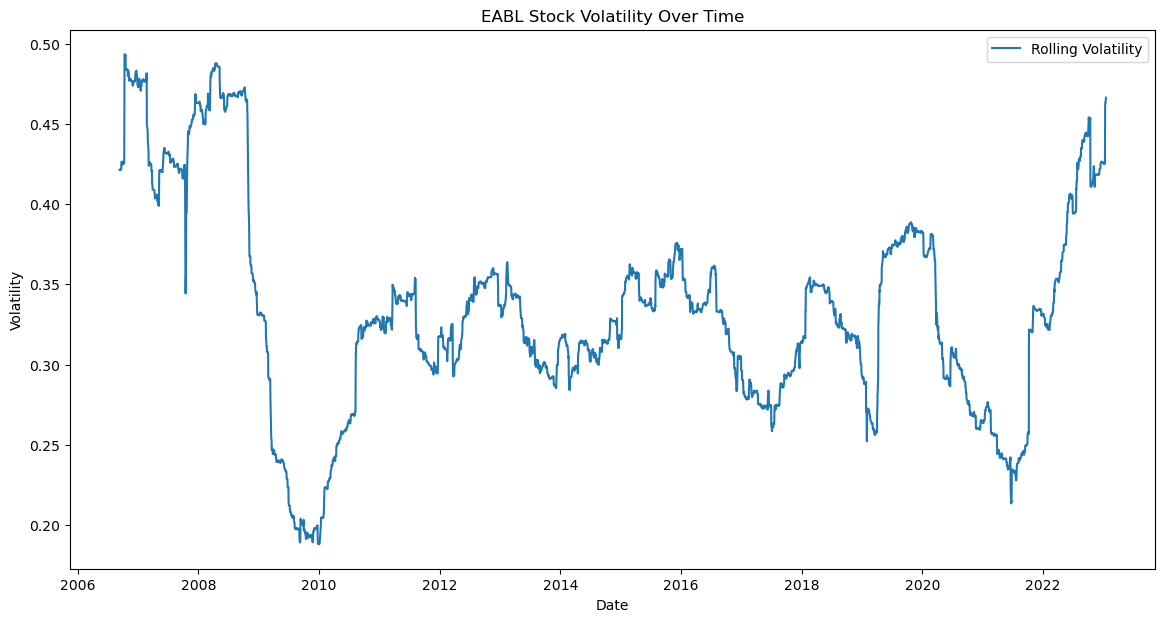

Latest Calculated Volatility Rate: 42.13%


0.42128649869728974

In [34]:
import numpy as np
import matplotlib.pyplot as plt


class VolatilityInsights:
    """
    A class to calculate and analyze stock volatility, including displaying the calculated volatility rate.
    """
    def __init__(self, data):
        self.data = data
        self.data['Returns'] = self.data['Close'].pct_change()
        
    def calculate_volatility(self, window=252):
        """
        Calculate rolling volatility using the standard deviation of daily returns,
        and return the last calculated volatility rate.
        """
        self.data['Volatility'] = self.data['Returns'].rolling(window=window).std() * np.sqrt(window)
        return self.data['Volatility'].iloc[-1]  # Return the latest volatility rate
    
    def plot_volatility(self):
        """
        Plot the rolling volatility over time, including the latest calculated volatility rate.
        """
        plt.figure(figsize=(14, 7))
        plt.plot(self.data['Date'], self.data['Volatility'], label='Rolling Volatility')
        plt.title('EABL Stock Volatility Over Time')
        plt.xlabel('Date')
        plt.ylabel('Volatility')
        plt.legend()
        plt.show()
        
        # Display the latest calculated volatility rate
        latest_volatility_rate = self.data['Volatility'].iloc[-1]
        print(f"Latest Calculated Volatility Rate: {latest_volatility_rate * 100:.2f}%")

# Initialize the refactored class with the filled data
volatility_insights= VolatilityInsights(data_filled)

# Calculate volatility and get the latest rate
latest_volatility_rate = volatility_insights.calculate_volatility()

# Plotting volatility with the latest calculated rate displayed
volatility_insights.plot_volatility()

# Display the latest calculated volatility rate
latest_volatility_rate


## ***Interpretation:***
- The latest calculated ***volatility rate of 42.13%*** indicates the degree of variation or dispersion of returns for EABL stock over the selected period. This relatively high volatility rate suggests that the stock has experienced significant price movements, which can be a double-edged sword for investors.

- High volatility might attract traders looking for short-term gains from price fluctuations. However, it also implies higher risk, as the stock's value can change dramatically in a short period.

## ***Insight:***
- Given this level of volatility, investors should carefully consider their risk tolerance and investment horizon before making decisions. Those with a lower risk tolerance might look for ways to mitigate risk, such as diversifying their investment portfolio or using financial derivatives for hedging. Conversely, investors comfortable with higher risk might view this as an opportunity to potentially achieve higher returns, keeping in mind the increased uncertainty involved.

## ***Abnormal Trade Volume Spikes***
 

- We'll focus on identifying and understanding instances where EABL's trading volume significantly deviates from its typical levels. Such spikes can indicate a variety of market conditions or events, such as new product launches, earnings reports, changes in management, or broader economic news impacting the stock. 

- Detecting these spikes can provide valuable insights into potential market sentiment changes or upcoming volatility

- We'll use a z-score approach to identify outliers in trading volumes. The z-score measures the number of standard deviations an element is from the mean. Typically, a z-score above 2 or below -2 is considered abnormal.

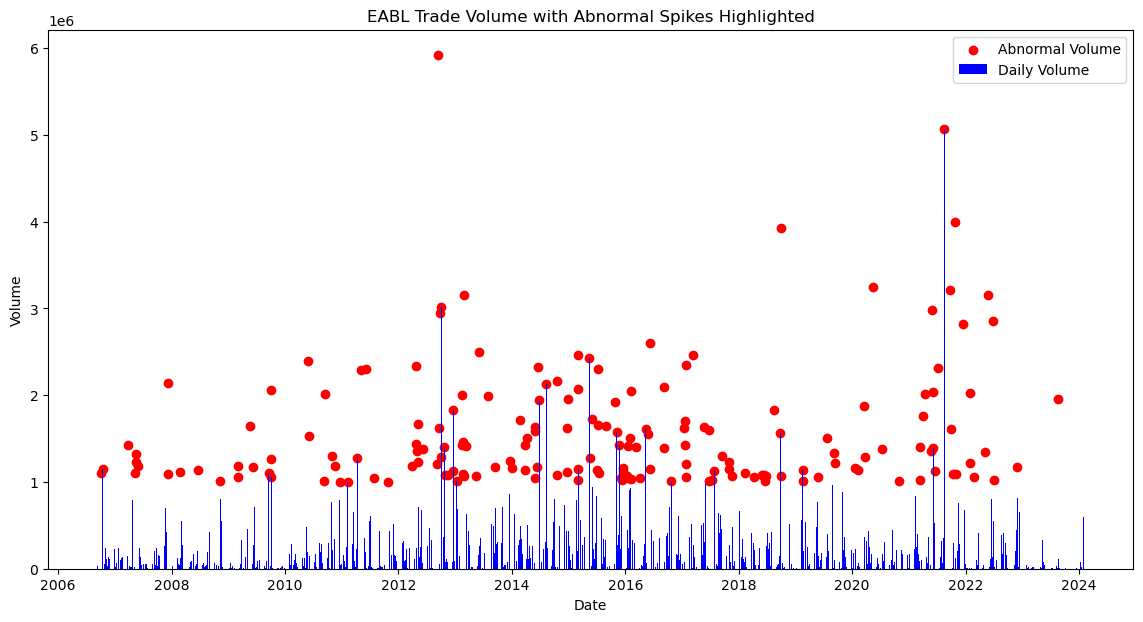

,Date,Volume,Volume_Z_Score
106,2023-08-16,1955500,4.557608
282,2022-11-29,1169300,2.467179
384,2022-07-01,1022000,2.075523
388,2022-06-27,2854500,6.947961
411,2022-05-24,3153500,7.742972


In [35]:
class AbnormalVolumeAnalysis:
    """
    A class to identify and analyze abnormal trade volumes.
    """
    def __init__(self, data):
        self.data = data
        self.data['Volume_Z_Score'] = (self.data['Volume'] - self.data['Volume'].mean()) / self.data['Volume'].std()
        
    def detect_abnormal_volumes(self, threshold=2):
        """
        Identify days with abnormal trading volumes based on the z-score threshold.
        A z-score above the threshold indicates a significant spike in volume.
        """
        self.data['Abnormal_Volume'] = self.data['Volume_Z_Score'].abs() >= threshold
        return self.data[self.data['Abnormal_Volume']]
    
    def plot_abnormal_volumes(self):
        """
        Visualize trading volumes and highlight days with abnormal volumes.
        """
        plt.figure(figsize=(14, 7))
        plt.bar(self.data['Date'], self.data['Volume'], color='blue', label='Daily Volume')
        # Highlight abnormal volume days
        abnormal_days = self.data[self.data['Abnormal_Volume']]
        plt.scatter(abnormal_days['Date'], abnormal_days['Volume'], color='red', label='Abnormal Volume')
        plt.title('EABL Trade Volume with Abnormal Spikes Highlighted')
        plt.xlabel('Date')
        plt.ylabel('Volume')
        plt.legend()
        plt.show()

# Initialize the class with the filled data
abnormal_volume_analysis = AbnormalVolumeAnalysis(data_filled)

# Detect and display abnormal volumes
abnormal_volumes = abnormal_volume_analysis.detect_abnormal_volumes()

# Plotting abnormal volumes
abnormal_volume_analysis.plot_abnormal_volumes()

# Display a few examples of detected abnormal volumes
abnormal_volumes[['Date', 'Volume', 'Volume_Z_Score']].head()


By calculating the z-score for each day's trading volume and flagging those with scores exceeding a threshold of 2, we pinpointed days with significantly higher than average trading activity.

### ***Examples of Detected Abnormal Volumes:***
- August 16, 2023: Volume of 1,955,500 with a z-score of 4.56.
- November 29, 2022: Volume of 1,169,300 with a z-score of 2.47.
- July 1, 2022: Volume of 1,022,000 with a z-score of 2.08.
- June 27, 2022: Volume of 2,854,500 with a z-score of 6.95.
- May 24, 2022: Volume of 3,153,500 with a z-score of 7.74.

### ***Observations***
- ***Significance of Spikes:*** The days highlighted with red in the plot indicate significant deviations in trading volume, suggesting notable events or news impacting investor sentiment and actions.

- ***Potential Causes:*** These spikes could be attributed to various factors such as earnings announcements, strategic corporate decisions, regulatory news, or market rumors. Further investigation into the specific dates could provide context to these volume spikes, offering deeper insights into their causes and implications.

- ***Investment Strategy Considerations:*** Abnormal volume spikes can serve as a precursor to price movements. An increase in volume often precedes price volatility, suggesting that the stock could be on the verge of a breakout or breakdown.

### ***Insights:***

- ***Market Surveillance:*** Investors and analysts should monitor these spikes closely, as they may offer early signals for strategic entry or exit points. Understanding the context behind each spike is crucial for leveraging this information effectively.

- ***Further Research:*** On identifying a spike, further research into news, announcements, or market conditions on and around the spike day can provide valuable insights into potential drivers of increased interest in EABL stocks.

- ***Risk Assessment:*** Significant volume spikes, especially when accompanied by price volatility, may indicate increased risk. Investors might need to adjust their risk management strategies accordingly.

## ***Dividends Analysis***

For the Dividends Analysis, we'll focus on understanding the trends and patterns in East African Breweries Limited (EABL)'s dividend payouts. Dividends are a critical component for investors, especially those seeking income from their investments. Analyzing the dividend history can provide insights into the company's profitability, stability, and management's confidence in future earnings.

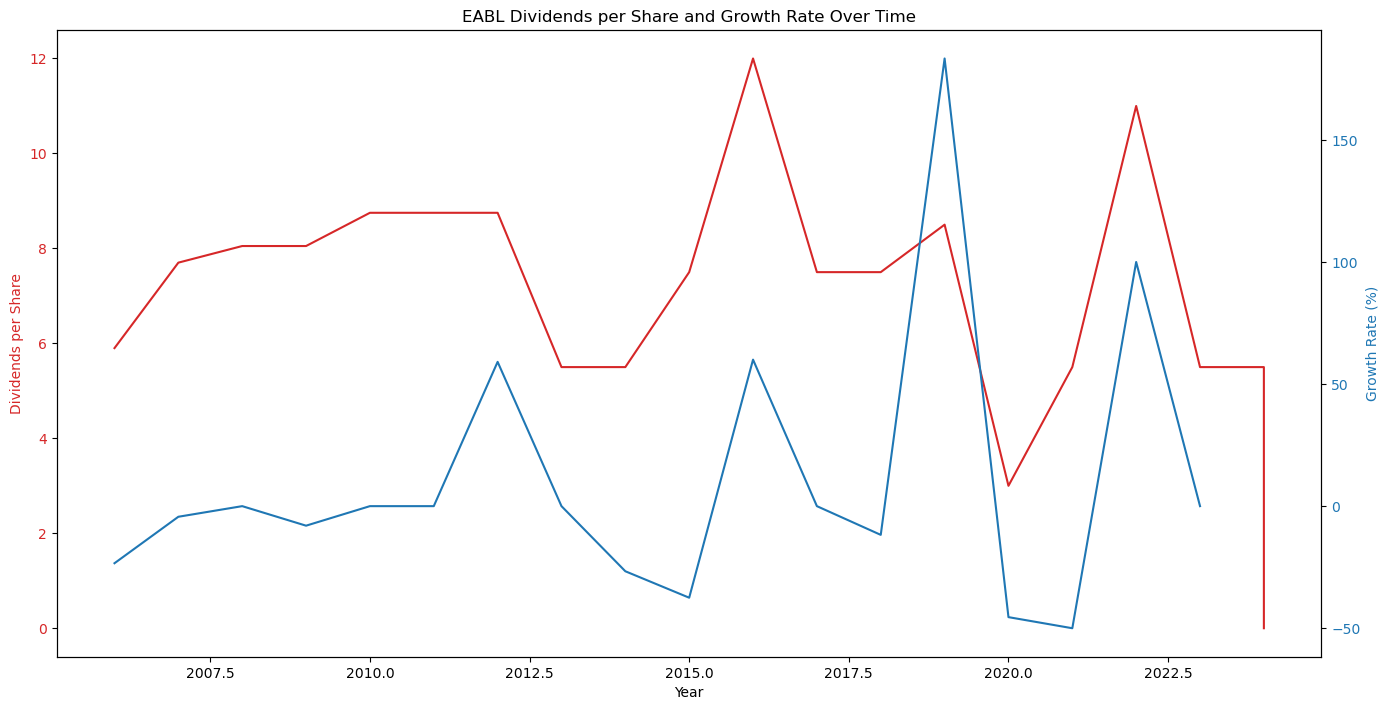

,Year,Dividends per share,Growth
3277,2010,8.75,0.000000
3530,2009,8.05,-8.000000
3780,2008,8.05,0.000000
4031,2007,7.70,-4.347826
4279,2006,5.90,-23.376623


In [36]:
class DividendsAnalysis:
    """
    A class for analyzing dividend payout trends.
    """
    def __init__(self, data):
        self.data = data
        # Ensure there's a 'Year' column for annual analysis
        if 'Year' not in self.data.columns:
            self.data['Date'] = pd.to_datetime(self.data['Date'])
            self.data['Year'] = self.data['Date'].dt.year
        self.dividend_data = self.data[['Year', 'Dividends per share']].drop_duplicates().dropna()
        
    def calculate_dividend_growth(self):
        """
        Calculate the year-over-year growth rate of dividends per share.
        """
        self.dividend_data['Growth'] = self.dividend_data['Dividends per share'].pct_change() * 100
        return self.dividend_data
    
    def plot_dividend_trends(self):
        """
        Visualize the trends in dividend payouts over time, including growth rates.
        """
        fig, ax1 = plt.subplots(figsize=(14, 7))

        color = 'tab:red'
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Dividends per Share', color=color)
        ax1.plot(self.dividend_data['Year'], self.dividend_data['Dividends per share'], color=color, label='Dividends per Share')
        ax1.tick_params(axis='y', labelcolor=color)
        
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:blue'
        ax2.set_ylabel('Growth Rate (%)', color=color)  # we already handled the x-label with ax1
        ax2.plot(self.dividend_data['Year'], self.dividend_data['Growth'], color=color, label='Growth Rate')
        ax2.tick_params(axis='y', labelcolor=color)
        
        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.title('EABL Dividends per Share and Growth Rate Over Time')
        plt.show()

# Initialize the class with the filled data
dividends_analysis = DividendsAnalysis(data_filled)

# Calculate dividend growth rates
dividend_growth_data = dividends_analysis.calculate_dividend_growth()

# Plotting dividend trends and growth rates
dividends_analysis.plot_dividend_trends()

# Displaying the calculated growth rates for review
dividend_growth_data[['Year', 'Dividends per share', 'Growth']].tail()


### ***Observations:***
- ***Dividends Per Share:*** The graph illustrates the trend of dividends per share over the observed period. An initial look suggests fluctuations in the amount paid out to shareholders, indicative of changes in the company's profit distribution policy or its earnings stability.

- ***Growth Rate:*** The year-over-year growth rates of dividends per share provides insight into the variability and direction of dividend changes. Negative growth rates indicate years where the dividend per share decreased compared to the previous year, while positive rates show an increase.

### ***Analysis of Recent Years:***
- In 2010, the dividend per share was 8.75, with no growth from the previous year, indicating stability in the dividend payout.

- The 2009 dividend per share was 8.05, showing a decrease of 8% from the previous year, suggesting a reduction in dividend payout.

- 2008 maintained the same dividend per share as in 2009, indicating stability after the decrease.

- In 2007, the dividend per share was 7.70, with a -4.35% growth rate from the previous year, again indicating a decrease.

- The year 2006 had a significant decrease in dividends per share to 5.90, with a -23.38% growth rate, highlighting a substantial reduction in dividend payout.


The fluctuation in dividend payouts and their growth rates can be indicative of the company's financial health, its earnings stability, and the management's confidence in future earnings. Consistent or increasing dividends are often seen as a sign of a company's stability and attractiveness to investors seeking income.

### ***Insights:***
- ***Investor Confidence:*** Stability or growth in dividends can increase investor confidence, making EABL's stock more attractive to income-focused investors.

- ***Financial Health Indication:*** Sudden drops or erratic changes in dividends could warrant a deeper analysis of the company's financial statements to understand the underlying causes.

- ***Investment Decision:*** Investors might use this information to decide whether to hold, buy, or sell EABL shares, depending on their investment strategy and the perceived sustainability of dividends.

## ***Trend Analysis***

For the Trend Analysis of East African Breweries Limited (EABL)'s stock, we will examine the historical price data to identify any prevailing trends, seasonal patterns, and any potential autocorrelation in the stock prices over time. Understanding these aspects can help in forecasting future price movements and in making informed investment decisions.

To conduct this analysis, we will use the TrendAnalysis class with methods for:

- ***Trend Detection:*** Identify long-term movements in the stock prices.
- ***Seasonality Analysis:*** Examine the data for regular, repeating patterns that occur over a known period.
- ***Autocorrelation Analysis:*** Determine if the stock prices are correlated with their past values, which can be useful for predictive modeling.

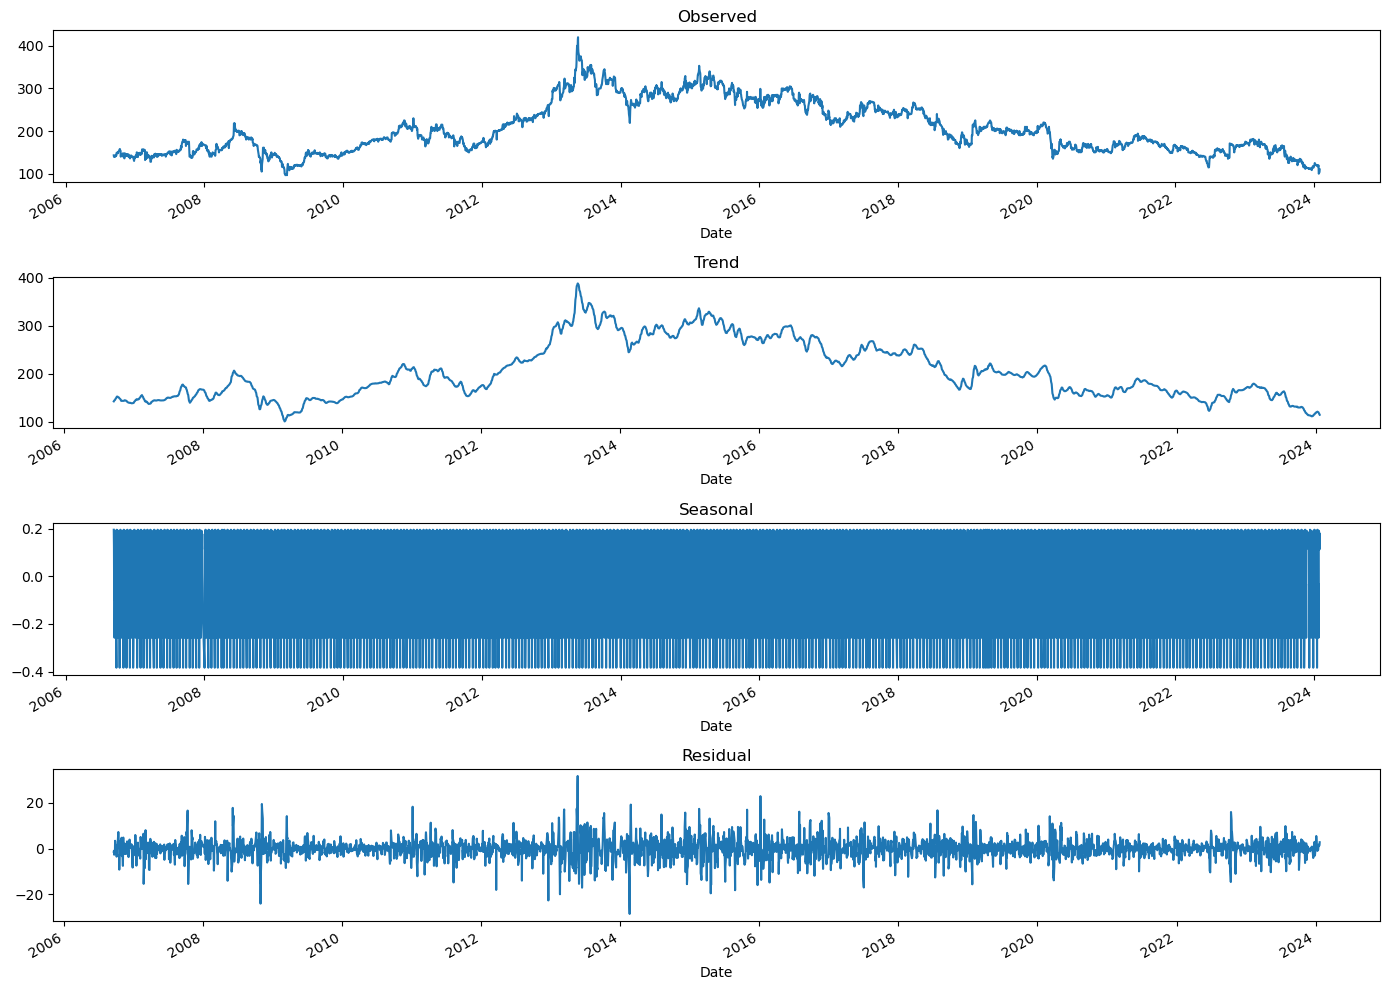

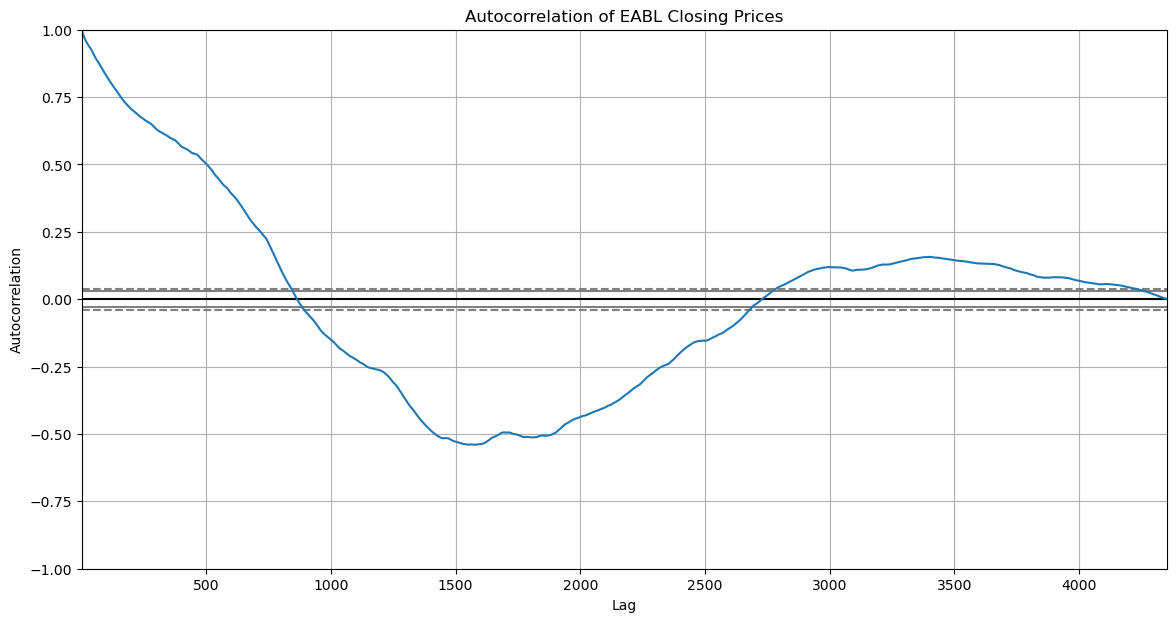

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

class TrendAnalysis:
    """
    A class to perform trend analysis on stock prices.
    """
    def __init__(self, data):
        self.data = data
        self.data.set_index('Date', inplace=True)
        
    def decompose_series(self, model='additive', freq='M'):
        """
        Decompose the time series into its trend, seasonal, and residual components.
        """
        # Assuming 'Close' price for analysis
        decomposition = seasonal_decompose(self.data['Close'], model=model, period=self._determine_period(freq))
        return decomposition
    
    def plot_decomposition(self, decomposition):
        """
        Plot the decomposed components of the time series.
        """
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))
        decomposition.observed.plot(ax=ax1)
        ax1.set_title('Observed')
        decomposition.trend.plot(ax=ax2)
        ax2.set_title('Trend')
        decomposition.seasonal.plot(ax=ax3)
        ax3.set_title('Seasonal')
        decomposition.resid.plot(ax=ax4)
        ax4.set_title('Residual')
        plt.tight_layout()
    
    def plot_autocorrelation(self):
        """
        Plot the autocorrelation of the 'Close' price to identify any autocorrelation patterns.
        """
        plt.figure(figsize=(14, 7))
        autocorrelation_plot(self.data['Close'])
        plt.title('Autocorrelation of EABL Closing Prices')
        plt.show()
    
    def _determine_period(self, freq):
        """
        Helper method to determine the period for seasonal decomposition based on frequency.
        """
        if freq == 'M':
            return 12  # Monthly data
        elif freq == 'Q':
            return 4  # Quarterly data
        else:
            return 52  # Weekly data, as a default

# Initialize the class with the filled data
trend_analysis = TrendAnalysis(data_filled.copy())

# Decompose the series
decomposition = trend_analysis.decompose_series()

# Plotting the decomposition
trend_analysis.plot_decomposition(decomposition)

# Plotting the autocorrelation
trend_analysis.plot_autocorrelation()


### ***Decomposition Analysis:***
- ***Observed:*** The observed data shows fluctuations over the years with a noticeable decline in values after 2013.

- ***Trend:*** There is a clear upward trend until around 2013, after which there is a decline. This suggests EABL's stock had been increasing over time but has started to decrease recently.

- ***Seasonal:*** The seasonal component reveals any repeating patterns or cycles in the stock prices over a specified period. In this case, the analysis aimed to uncover any monthly or quarterly patterns, but the visualization suggests that seasonality may not be a dominant feature in EABL's stock price movements.

- ***Residual:*** Residuals are relatively stable with some spikes indicating instances where the price significantly deviated from the trend and seasonal components.

### ***Autocorrelation Analysis:***
- The autocorrelation plot indicates how the stock's closing prices correlate with its past values. Peaks in the plot suggest that the stock prices have some degree of predictability based on their past values. In this case, the autocorrelation plot shows a gradual decline, suggesting that past prices have some influence on future prices, but this influence diminishes over time.

### ***Observations:***
- ***Trend Identification:*** Understanding the long-term trend is crucial for making investment decisions, especially for buy-and-hold investors. The trend analysis suggests a direction that the stock might continue to follow.

- ***Seasonality Insights:*** While the analysis does not strongly indicate significant seasonality in EABL's stock prices, investors should still consider other cyclical factors that might affect the stock market in general.

- ***Predictive Modeling:*** The autocorrelation analysis provides a basis for developing predictive models. Stocks with significant autocorrelation can often be forecasted more accurately using past price data.

### ***Insights:***
- ***Long-Term Investments:*** Investors looking for long-term opportunities should pay close attention to the trend component to align their investment strategies with the overall direction of the stock.

- ***Trading Strategies:*** Traders might use autocorrelation insights to develop short-term trading strategies, capitalizing on the predictability of price movements.

- ***Diversification:*** The absence of strong seasonality suggests that EABL's stock might not offer diversification benefits based on seasonal trading strategies alone. Investors might need to look for other stocks or assets with clearer seasonal patterns for diversification purposes.

Investigate the causes of the decline post-2013 and develop strategies to mitigate or reverse this trend.

## ***Lag Analysis***

For the Lag Analysis, we'll examine how various market indicators, specifically inflation rates, GDP, USD exchange rates, and unemployment rates, impact East African Breweries Limited (EABL)'s stock prices. Understanding these relationships can provide insights into how external economic factors influence stock performance, which is essential for making informed investment decisions.

To conduct this analysis, we will enhance the LagAnalysis class to include methods for:

- ***Correlation Analysis:*** To identify the strength and direction of the relationship between EABL's stock prices and each market indicator.
- ***Lag Analysis:*** To determine if there's a time lag between changes in market indicators and their impact on EABL's stock prices, indicating predictability.

This analysis will involve statistical tests to measure correlation and lag effects, providing a clearer picture of how external economic factors influence EABL's stock performance.